## Neural Network Activation Function Numpy Implementation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In this tutorial I will implement 6 activations used in Neural Networks.
The activations are as follows:
    1. Sigmoid Activation
    2. Softmax Activation
    3. Tanh Activation
    4. ReLU Activation
    5. LeakyReLU Activation
    6. ELU Activation
 
 For each activation function I will do the following:
     1. Function Definition
     2. Numpy Implementation.
     3. Graphical Representation on the function using matplotlib package.
     4. Features of the activation function
     5. Problems with activation function
     
     

## Sigmoid Activation Function

Function Definition is as follows: 
$y = 1/ (1+ \exp^{-x})$

[  4.53978687e-05   7.48462275e-05   1.23394576e-04   2.03426978e-04
   3.35350130e-04   5.52778637e-04   9.11051194e-04   1.50118226e-03
   2.47262316e-03   4.07013772e-03   6.69285092e-03   1.09869426e-02
   1.79862100e-02   2.93122308e-02   4.74258732e-02   7.58581800e-02
   1.19202922e-01   1.82425524e-01   2.68941421e-01   3.77540669e-01
   5.00000000e-01   6.22459331e-01   7.31058579e-01   8.17574476e-01
   8.80797078e-01   9.24141820e-01   9.52574127e-01   9.70687769e-01
   9.82013790e-01   9.89013057e-01   9.93307149e-01   9.95929862e-01
   9.97527377e-01   9.98498818e-01   9.99088949e-01   9.99447221e-01
   9.99664650e-01   9.99796573e-01   9.99876605e-01   9.99925154e-01]


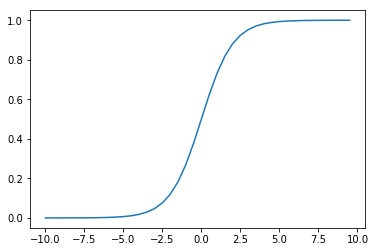

In [22]:
# Defining a weight array using numpy.random function
startValue = -10
endValue = 10
stepSize = 0.5 # Lower the step size steeper the graph

def sigmoidFunction(weightVector):
    sigWeight = 1/(1+np.exp(-weight))
    print sigWeight
    return sigWeight

def plotSigmoid(weightVector,sigWegiht):
    plt.plot(weight,sigWeight)
    
weight = np.arange(startValue,endValue,stepSize)
sigWeight = sigmoidFunction(weight)
plotSigmoid(weight,sigWeight)

Features of Sigmoid Function:
    1. Squashes numbers between [0,1]
    2. Used for binary Classification

Problems with Sigmoid Function:
    1. Saturation neurons kills the gradients during backpropogration. Consider the weights above 95th and below 5th percentile, the sigmoid of these weights will be near to 1 or 0 respectively which makes the delta very small thus negligible. 
    2. Sigmoid outputs are not zero centered, which makes the convergence a very slow process using the activation.
    3. numpy.exp() is an very expensive process (computationally) compared to the functions used in the other activations